<a href="https://colab.research.google.com/github/afathelbab/office_supplies/blob/main/office_supplies_project_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Project - DataCamp

Congratulations, you have just landed your first job as a data analyst at Pens & Printers! Pens & Printers is a national office supplies chain. They have just reported a 23% drop in revenue in the past year. At the moment, they send office supplies out of warehouses in four regions:
East, West, South, and Central, and all four warehouses stock the same products. The Head of Sales thinks this leads to large amounts of unsold products in some locations.
The management at Pens & Printers would like you to look at the data and present to them:
>*  the popularity of products in each region. 
* Are there products that do not sell in some locations? 
* Are there any other patterns over time in each region that you can find in the data?

Your presentation should be no longer than ten minutes. It should include no more than eight slides of content. You will be presenting to the Head of Sales.

## Load Data and Import Libraries

In [2]:
# Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive 
%matplotlib inline

In [3]:
# Reading the dataset
drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/My Drive/datasets/office_supplies.csv')
df.head()

Mounted at /content/gdrive


,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2015-110870,2015-12-12,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.94,6,0.0,NaN
1,CA-2015-110870,2015-12-12,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.76,7,0.0,NaN
2,CA-2014-143210,2014-12-01,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.90,2,0.0,NaN
3,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.84,3,0.0,NaN
4,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.82,2,0.0,NaN


## **Data Cleaning**

In [4]:
# Drop dublicated Rows
df.drop_duplicates(inplace=True, ignore_index=True)

In [5]:
# Cleaning Columns Names
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('-','_')

In [6]:
#Change Order Date to Date type
df['order_date'] = df['order_date'].astype('datetime64[ns]')

## EDA

### 1. The popularity of products in each region. 

In [7]:
sns.set_style('darkgrid')

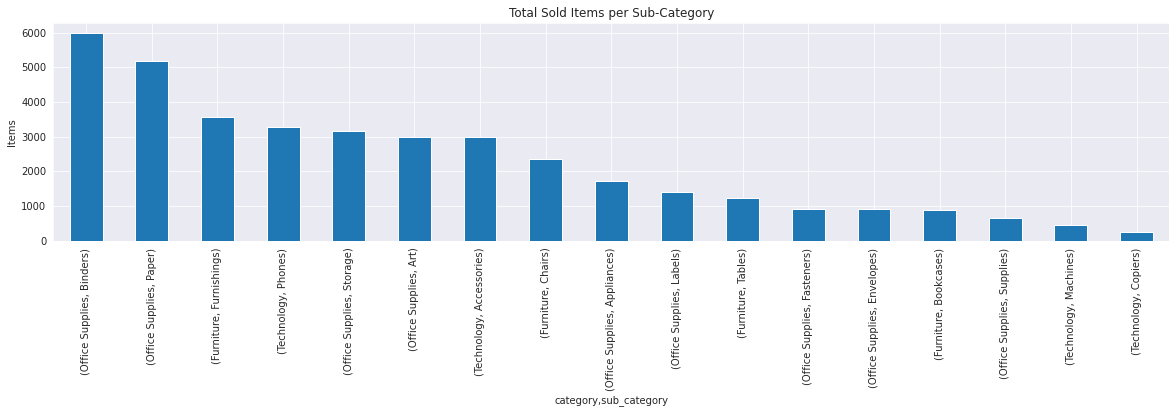

In [8]:
# First let's have a look on the most sold categories/sub-categories all over the 4 regions
df.groupby(['category','sub_category'])['quantity'].sum().sort_values(ascending=False).plot.bar(figsize=(20,4), title='Total Sold Items per Sub-Category', ylabel='Items');

In [9]:
# Most sold products all the time
df.groupby(['product_name','category','sub_category'])['quantity'].sum().sort_values(ascending=False).head(10)

product_name                                                category         sub_category
Staples                                                     Office Supplies  Fasteners       215
Staple envelope                                             Office Supplies  Envelopes       170
Easy-staple paper                                           Office Supplies  Paper           150
Staples in misc. colors                                     Office Supplies  Art              86
KI Adjustable-Height Table                                  Furniture        Tables           74
Avery Non-Stick Binders                                     Office Supplies  Binders          71
Storex Dura Pro Binders                                     Office Supplies  Binders          71
GBC Premium Transparent Covers with Diagonal Lined Pattern  Office Supplies  Binders          67
Situations Contoured Folding Chairs, 4/Set                  Furniture        Chairs           64
Staple-based wall hangings           

In [10]:
# Least sold products all the time
df.groupby(['product_name','category','sub_category'])['quantity'].sum().sort_values(ascending=True).head(10)

product_name                                                               category         sub_category
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs               Furniture        Chairs          1
Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order  Furniture        Bookcases       1
Xerox 20                                                                   Office Supplies  Paper           1
Penpower WorldCard Pro Card Scanner                                        Technology       Machines        1
Boston 1900 Electric Pencil Sharpener                                      Office Supplies  Art             1
RCA ViSYS 25423RE1 Corded phone                                            Technology       Phones          2
Multimedia Mailers                                                         Office Supplies  Envelopes       2
Xerox 1984                                                                 Office Supplies  Paper           2
Eureka Disposab

In [11]:
# Most sold Sub Categories all the time
df.groupby(['category','sub_category'])['quantity'].sum().sort_values(ascending=False)

category         sub_category
Office Supplies  Binders         5974
                 Paper           5178
Furniture        Furnishings     3563
Technology       Phones          3285
Office Supplies  Storage         3158
                 Art             3000
Technology       Accessories     2976
Furniture        Chairs          2354
Office Supplies  Appliances      1729
                 Labels          1400
Furniture        Tables          1241
Office Supplies  Fasteners        914
                 Envelopes        906
Furniture        Bookcases        868
Office Supplies  Supplies         647
Technology       Machines         440
                 Copiers          234
Name: quantity, dtype: int64

### Central

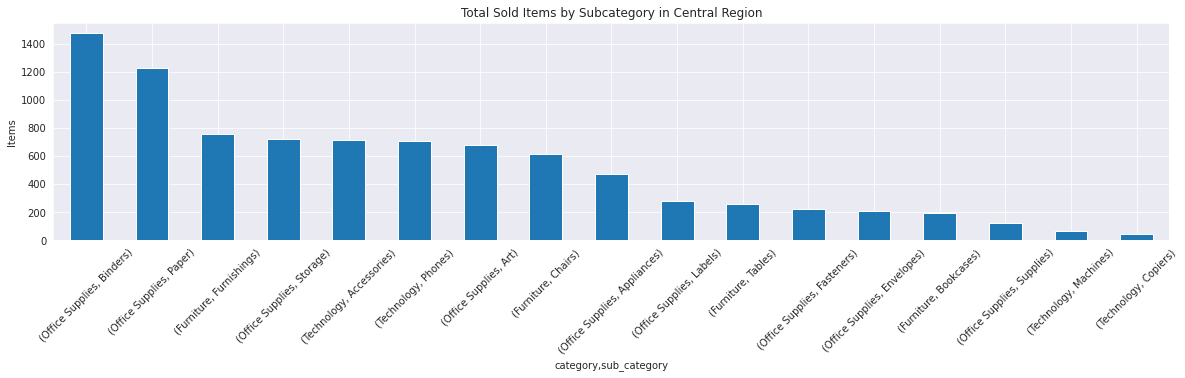

In [12]:
# Central Region
df.groupby(['region','category','sub_category'])['quantity'].sum()['Central'].sort_values(ascending=False)\
.plot.bar(title='Total Sold Items by Subcategory in Central Region', ylabel = 'Items', figsize=(20,4), rot=45);

In [13]:
# Most Sold Products in Central Region All the time
df.loc[df['region'] == 'Central'].groupby(['product_name','category','sub_category'])['quantity'].sum().sort_values(ascending=False).head(10)

product_name                                          category         sub_category
Staples                                               Office Supplies  Fasteners       70
Staple envelope                                       Office Supplies  Envelopes       43
Easy-staple paper                                     Office Supplies  Paper           40
GBC Instant Report Kit                                Office Supplies  Binders         34
Storex DuraTech Recycled Plastic Frosted Binders      Office Supplies  Binders         33
Avery Durable Binders                                 Office Supplies  Binders         29
Avery Heavy-Duty EZD View Binder with Locking Rings   Office Supplies  Binders         29
Global Stack Chair without Arms, Black                Furniture        Chairs          27
Acco 6 Outlet Guardian Premium Plus Surge Suppressor  Office Supplies  Appliances      27
Global High-Back Leather Tilter, Burgundy             Furniture        Chairs          26
Name: quantity, 

In [14]:
# Least Sold Products in Central Region All the time
df.loc[df['region'] == 'Central'].groupby(['product_name','category','sub_category'])['quantity'].sum().sort_values(ascending=True).head(10)

product_name                                category         sub_category
Imation 30456 USB Flash Drive 8GB           Technology       Accessories     1
Newell 334                                  Office Supplies  Art             1
Panasonic KX TS3282W Corded phone           Technology       Phones          1
Pastel Pink Envelopes                       Office Supplies  Envelopes       1
PayAnywhere Card Reader                     Technology       Phones          1
Plantronics MX500i Earset                   Technology       Phones          1
Avery 497                                   Office Supplies  Labels          1
Avery 494                                   Office Supplies  Labels          1
Poly Designer Cover & Back                  Office Supplies  Binders         1
Polycom SoundPoint Pro SE-225 Corded phone  Technology       Phones          1
Name: quantity, dtype: int64

### East

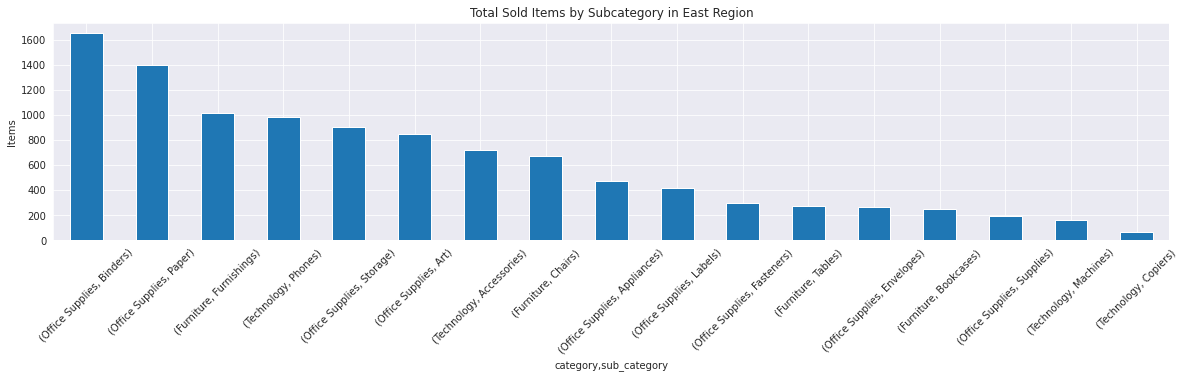

In [15]:
# East Region
df.groupby(['region','category','sub_category'])['quantity'].sum()['East'].sort_values(ascending=False)\
.plot.bar(title='Total Sold Items by Subcategory in East Region', ylabel = 'Items', figsize=(20,4), rot=45);

In [16]:
# Most Sold Products in East Region All the time
df.loc[df['region'] == 'East'].groupby(['product_name','category','sub_category'])['quantity'].sum().sort_values(ascending=False).head(10)

product_name                                                category         sub_category
Staples                                                     Office Supplies  Fasteners       71
Staple envelope                                             Office Supplies  Envelopes       68
Easy-staple paper                                           Office Supplies  Paper           41
Fellowes PB200 Plastic Comb Binding Machine                 Office Supplies  Binders         32
OIC Colored Binder Clips, Assorted Sizes                    Office Supplies  Fasteners       31
Dual Level, Single-Width Filing Carts                       Office Supplies  Storage         29
GBC Premium Transparent Covers with Diagonal Lined Pattern  Office Supplies  Binders         28
PureGear Roll-On Screen Protector                           Technology       Phones          27
Situations Contoured Folding Chairs, 4/Set                  Furniture        Chairs          26
Storex Dura Pro Binders                       

In [17]:
# Least Sold Products in East Region All the time
df.loc[df['region'] == 'East'].groupby(['product_name','category','sub_category'])['quantity'].sum().sort_values(ascending=True).head(10)

product_name                                                                 category         sub_category
Cisco Small Business SPA 502G VoIP phone                                     Technology       Phones          1
Tenex Carpeted, Granite-Look or Clear Contemporary Contour Shape Chair Mats  Furniture        Furnishings     1
Hon 4060 Series Tables                                                       Furniture        Tables          1
GBC ProClick 150 Presentation Binding System                                 Office Supplies  Binders         1
Classic Ivory Antique Telephone ZL1810                                       Technology       Phones          1
Enermax Acrylux Wireless Keyboard                                            Technology       Accessories     1
Westinghouse Clip-On Gooseneck Lamps                                         Furniture        Furnishings     1
ClearOne Communications CHAT 70 OC Speaker Phone                             Technology       Phones         

### West

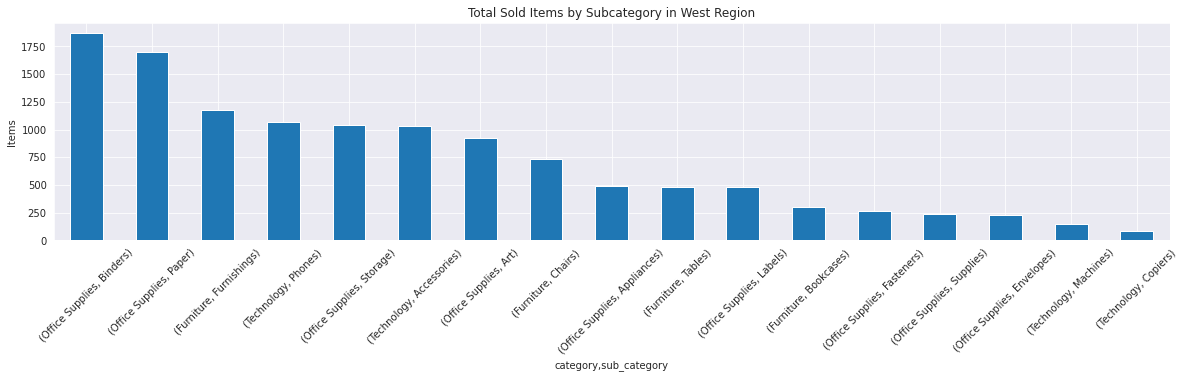

In [18]:
# West Region
df.groupby(['region','category','sub_category'])['quantity'].sum()['West'].sort_values(ascending=False)\
.plot.bar(title='Total Sold Items by Subcategory in West Region', ylabel = 'Items', figsize=(20,4), rot=45);

In [19]:
# Most Sold Products in West Region All the time
df.loc[df['region'] == 'West'].groupby(['product_name','category','sub_category'])['quantity'].sum().sort_values(ascending=False).head(10)

product_name                                                          category         sub_category
Staples                                                               Office Supplies  Fasteners       43
Easy-staple paper                                                     Office Supplies  Paper           35
Staple envelope                                                       Office Supplies  Envelopes       32
Wilson Jones Clip & Carry Folder Binder Tool for Ring Binders, Clear  Office Supplies  Binders         32
Cardinal EasyOpen D-Ring Binders                                      Office Supplies  Binders         31
Eldon Wave Desk Accessories                                           Furniture        Furnishings     30
Eldon Shelf Savers Cubes and Bins                                     Office Supplies  Storage         29
Vinyl Sectional Post Binders                                          Office Supplies  Binders         29
Logitech P710e Mobile Speakerphone                  

In [20]:
# Least Sold Products in West Region All the time
df.loc[df['region'] == 'West'].groupby(['product_name','category','sub_category'])['quantity'].sum().sort_values(ascending=True).head(10)

product_name                                                                  category         sub_category
Grandstream GXP2100 Mainstream Business Phone                                 Technology       Phones          1
Tensor Brushed Steel Torchiere Floor Lamp                                     Furniture        Furnishings     1
LG G3                                                                         Technology       Phones          1
Riverside Furniture Oval Coffee Table, Oval End Table, End Table with Drawer  Furniture        Tables          1
DAX Black Cherry Wood-Tone Poster Frame                                       Furniture        Furnishings     1
Acco Perma 2700 Stacking Storage Drawers                                      Office Supplies  Storage         1
Hunt BOSTON Vista Battery-Operated Pencil Sharpener, Black                    Office Supplies  Art             1
While You Were Out Pads, 50 per Pad, 4 x 5 1/4, Green Cycle                   Office Supplies  Paper 

### South

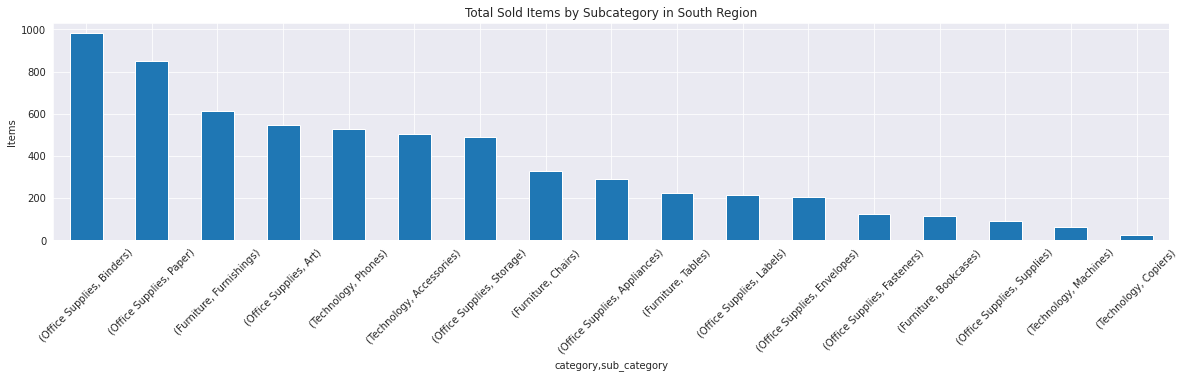

In [21]:
# South Region
df.groupby(['region','category','sub_category'])['quantity'].sum()['South'].sort_values(ascending=False)\
.plot.bar(title='Total Sold Items by Subcategory in South Region', ylabel = 'Items', figsize=(20,4), rot=45);

In [22]:
# Most Sold Products in South Region All the time
df.loc[df['region'] == 'South'].groupby(['product_name','category','sub_category'])['quantity'].sum().sort_values(ascending=False).head(10)

product_name                                               category         sub_category
Easy-staple paper                                          Office Supplies  Paper           34
Staples                                                    Office Supplies  Fasteners       31
Staple envelope                                            Office Supplies  Envelopes       27
Tennsco Double-Tier Lockers                                Office Supplies  Storage         26
Wilson Jones Turn Tabs Binder Tool for Ring Binders        Office Supplies  Binders         24
High-Back Leather Manager's Chair                          Furniture        Chairs          24
Heavy-Duty E-Z-D Binders                                   Office Supplies  Binders         23
GBC Prepunched Paper, 19-Hole, for Binding Systems, 24-lb  Office Supplies  Binders         21
Acrylic Self-Standing Desk Frames                          Furniture        Furnishings     21
Canvas Sectional Post Binders                           

In [23]:
# Least Sold Products in South Region All the time
df.loc[df['region'] == 'South'].groupby(['product_name','category','sub_category'])['quantity'].sum().sort_values(ascending=True).head(10)

product_name                                                           category         sub_category
Euro Pro Shark Stick Mini Vacuum                                       Office Supplies  Appliances      1
Sanford 52201 APSCO Electric Pencil Sharpener                          Office Supplies  Art             1
Xerox 1924                                                             Office Supplies  Paper           1
GBC DocuBind TL200 Manual Binding Machine                              Office Supplies  Binders         1
Logitech G430 Surround Sound Gaming Headset with Dolby 7.1 Technology  Technology       Accessories     1
Howard Miller 13-3/4" Diameter Brushed Chrome Round Wall Clock         Furniture        Furnishings     1
SanDisk Cruzer 32 GB USB Flash Drive                                   Technology       Accessories     1
Acme Kleen Earth Office Shears                                         Office Supplies  Supplies        1
Belkin Standard 104 key USB Keyboard               

## 2. Are there products that do not sell in some locations? 

In [24]:
# First, let's create 4 sub datasets for each region
df_central = df[df['region'] == 'Central']
df_east = df[df['region'] == 'East']
df_west = df[df['region'] == 'West']
df_south = df[df['region'] == 'South']

### Products that don't sell in East:

In [120]:
# Products that sell in Central but Not in East
central_east = df_central[['product_name','category','sub_category']].merge(df_east[['product_name']].drop_duplicates(), on='product_name', how='left', indicator=True).drop_duplicates()
central_east.drop(central_east.loc[central_east['_merge'] == 'both'].index, inplace=True)
central_east.drop('_merge', axis=1, inplace=True)
central_east.reset_index(drop=True, inplace=True)

In [121]:
# Products that sell in West but Not in East
west_east = df_west[['product_name','category','sub_category']].merge(df_east[['product_name']].drop_duplicates(), on='product_name', how='left', indicator=True).drop_duplicates()
west_east.drop(west_east.loc[west_east['_merge'] == 'both'].index, inplace=True)
west_east.drop('_merge', axis=1, inplace=True)
west_east.reset_index(drop=True, inplace=True)

In [122]:
# Products that sell in South but Not in East
south_east = df_south[['product_name','category','sub_category']].merge(df_east[['product_name']].drop_duplicates(), on='product_name', how='left', indicator=True).drop_duplicates()
south_east.drop(south_east.loc[south_east['_merge'] == 'both'].index, inplace=True)
south_east.drop('_merge', axis=1, inplace=True)
south_east.reset_index(drop=True, inplace=True)

In [132]:
# Products that don't sell in East Region
no_sales_east = central_east.append(west_east, ignore_index=True).append(south_east, ignore_index=True).drop_duplicates()
no_sales_east.shape

(435, 3)

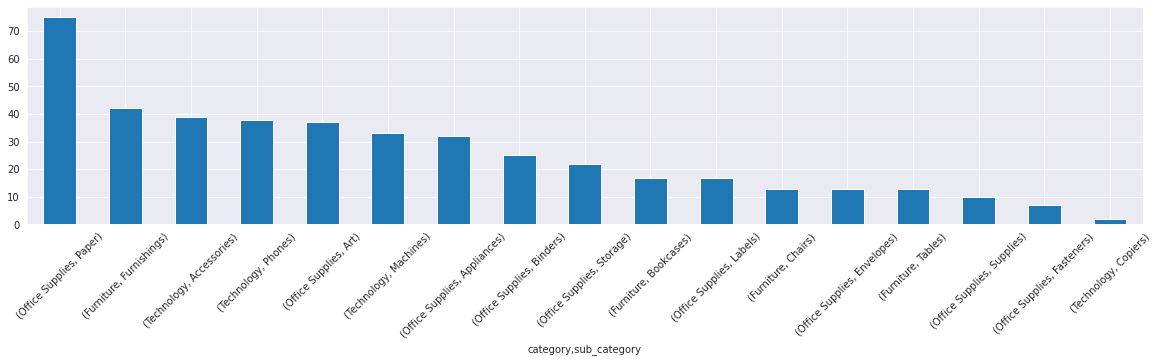

In [144]:
no_sales_east.groupby(['category','sub_category'])['product_name'].count().sort_values(ascending=False).plot.bar(figsize=(20,4), rot=45);

### Products that don't sell in West:

In [123]:
# Products that sell in Central but Not in West
central_west = df_central[['product_name','category','sub_category']].merge(df_west[['product_name']].drop_duplicates(), on='product_name', how='left', indicator=True).drop_duplicates()
central_west.drop(central_west.loc[central_west['_merge'] == 'both'].index, inplace=True)
central_west.drop('_merge', axis=1, inplace=True)
central_west.reset_index(drop=True, inplace=True)

In [124]:
# Products that sell in East but Not in West
east_west = df_east[['product_name','category','sub_category']].merge(df_west[['product_name']].drop_duplicates(), on='product_name', how='left', indicator=True).drop_duplicates()
east_west.drop(east_west.loc[east_west['_merge'] == 'both'].index, inplace=True)
east_west.drop('_merge', axis=1, inplace=True)
east_west.reset_index(drop=True, inplace=True)

In [125]:
# Products that sell in South but Not in West
south_west = df_south[['product_name','category','sub_category']].merge(df_west[['product_name']].drop_duplicates(), on='product_name', how='left', indicator=True).drop_duplicates()
south_west.drop(south_west.loc[south_west['_merge'] == 'both'].index, inplace=True)
south_west.drop('_merge', axis=1, inplace=True)
south_west.reset_index(drop=True, inplace=True)

In [131]:
# Products that don't sell in West Region
no_sales_west = central_west.append(east_west, ignore_index=True).append(south_west, ignore_index=True).drop_duplicates()
no_sales_west.shape

(347, 3)

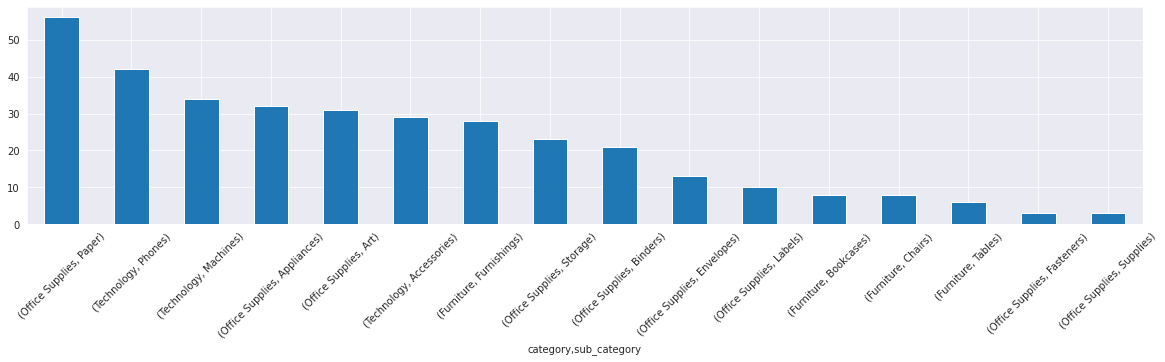

In [143]:
no_sales_west.groupby(['category','sub_category'])['product_name'].count().sort_values(ascending=False).plot.bar(figsize=(20,4), rot=45);

### Products that don't sell in Central:

In [126]:
# Products that sell in West but Not in Central
west_central = df_west[['product_name','category','sub_category']].merge(df_central[['product_name']].drop_duplicates(), on='product_name', how='left', indicator=True).drop_duplicates()
west_central.drop(west_central.loc[west_central['_merge'] == 'both'].index, inplace=True)
west_central.drop('_merge', axis=1, inplace=True)
west_central.reset_index(drop=True, inplace=True)

In [127]:
# Products that sell in East but Not in Central
east_central = df_east[['product_name','category','sub_category']].merge(df_central[['product_name']].drop_duplicates(), on='product_name', how='left', indicator=True).drop_duplicates()
east_central.drop(east_central.loc[east_central['_merge'] == 'both'].index, inplace=True)
east_central.drop('_merge', axis=1, inplace=True)
east_central.reset_index(drop=True, inplace=True)

In [128]:
# Products that sell in South but Not in Central
south_central = df_south[['product_name','category','sub_category']].merge(df_central[['product_name']].drop_duplicates(), on='product_name', how='left', indicator=True).drop_duplicates()
south_central.drop(south_central.loc[south_central['_merge'] == 'both'].index, inplace=True)
south_central.drop('_merge', axis=1, inplace=True)
south_central.reset_index(drop=True, inplace=True)

In [130]:
# Products that don't sell in Central Region
no_sales_central = west_central.append(east_central, ignore_index=True).append(south_central, ignore_index=True).drop_duplicates()
no_sales_central.shape

(556, 3)

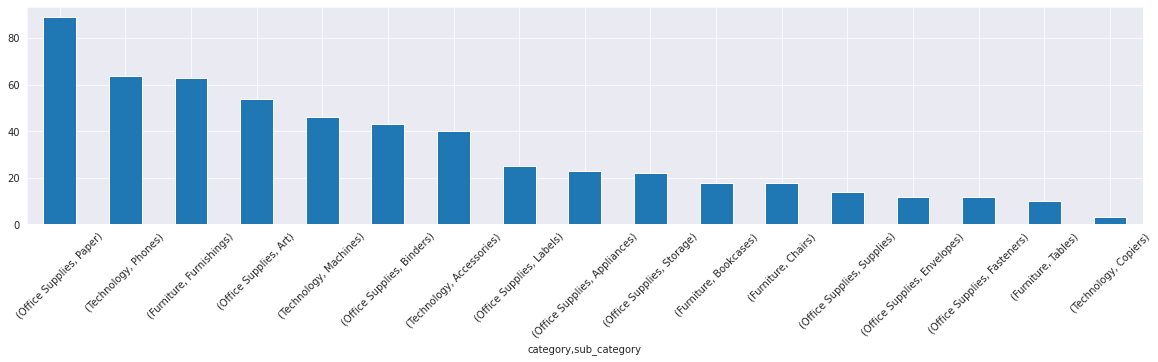

In [142]:
no_sales_central.groupby(['category','sub_category'])['product_name'].count().sort_values(ascending=False).plot.bar(figsize=(20,4), rot=45);

### Products that don't sell in South:

In [114]:
# Products that sell in West but Not in South
west_south = df_west[['product_name','category','sub_category']].merge(df_south[['product_name']].drop_duplicates(), on='product_name', how='left', indicator=True).drop_duplicates()
west_south.drop(west_south.loc[west_south['_merge'] == 'both'].index, inplace=True)
west_south.drop('_merge', axis=1, inplace=True)
west_south.reset_index(drop=True, inplace=True)

In [115]:
# Products that sell in East but Not in South
east_south = df_east[['product_name','category','sub_category']].merge(df_south[['product_name']].drop_duplicates(), on='product_name', how='left', indicator=True).drop_duplicates()
east_south.drop(east_south.loc[east_south['_merge'] == 'both'].index, inplace=True)
east_south.drop('_merge', axis=1, inplace=True)
east_south.reset_index(drop=True, inplace=True)


In [116]:
# Products that sell in Central but Not in South
central_south = df_central[['product_name','category','sub_category']].merge(df_south[['product_name']].drop_duplicates(), on='product_name', how='left', indicator=True).drop_duplicates()
central_south.drop(central_south.loc[central_south['_merge'] == 'both'].index, inplace=True)
central_south.drop('_merge', axis=1, inplace=True)
central_south.reset_index(drop=True, inplace=True)

In [129]:
# Products that don't sell in South Region
no_sales_south = west_south.append(east_south, ignore_index=True).append(central_south, ignore_index=True).drop_duplicates()
no_sales_south.shape

(808, 3)

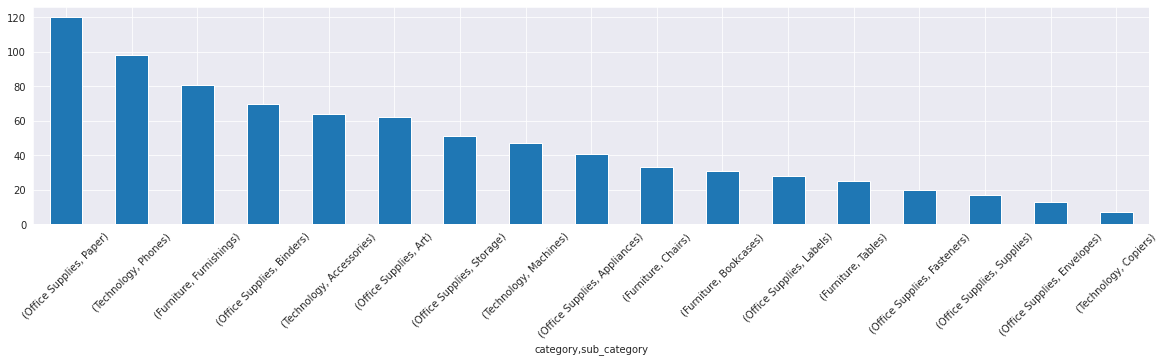

In [141]:
no_sales_south.groupby(['category','sub_category'])['product_name'].count().sort_values(ascending=False).plot.bar(figsize=(20,4), rot=45);